# Data Wranglig:

Clean, transform, merge, reshape

In [7]:
import pandas as pd

## Combining and merging data sets 

In [8]:
df1 = pd.DataFrame( {'data1':range(7), 'key':list('bbacaab') })
df2 = pd.DataFrame( {'data2':range(20,23), 'key':list('abd') })

No te líes, a la columna le hemos llamado _key_ como le podríamos haber llamado Paco, no tiene nada que ver con claves de diccionario

In [9]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [10]:
df2

,data2,key
0,20,a
1,21,b
2,22,d


###  Merge
Hace un joins

#### Join.
Producto cartesiando de los elementos con llaves en común

<img src="http://www.vertabelo.com/_file/blog/sql-joins/sql-joins-venn-diagrams-inner-join.png">

Sin ningún parámetro, él busca la columna que tenga el mismo nombre y sólo muestra los valores que comparten claves

In [11]:
df1.merge(df2)

,data1,key,data2
0,0,b,21
1,1,b,21
2,6,b,21
3,2,a,20
4,4,a,20
5,5,a,20


_Nota 1_: que se repiten los valores de df2 para cada distinto resultado de df1.

_Nota 2_: para los joing, el valor cuyo metodo merge llamamos es la izquierda y el parámetro es la derecha.

_Nota 3_: el gráfico es en cuanto a la _columna_ con la que estamos haciendo el join, no está quieriendo decir que estemos haciendo suconjuntos de filas

In [12]:
df2.merge(df1)

,data2,key,data1
0,20,a,2
1,20,a,4
2,20,a,5
3,21,b,0
4,21,b,1
5,21,b,6


_Nota_: sale lo mismo pero en otro orden


In [14]:
df2_duplicados_de_a = pd.DataFrame( {'data2':range(20,24), 'key':list('abda') })

Tiene la a duplicada en key

In [15]:
df2_duplicados_de_a

,data2,key
0,20,a
1,21,b
2,22,d
3,23,a


Recordemos df1:

In [17]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [16]:
df1.merge(df2_duplicados_de_a)

,data1,key,data2
0,0,b,21
1,1,b,21
2,6,b,21
3,2,a,20
4,2,a,23
5,4,a,20
6,4,a,23
7,5,a,20
8,5,a,23


_Nota_: Hemos pasado de 6 a 9, porque es un producto cartesiando

In [20]:
df3 = pd.DataFrame({'data1':range(7), 'left_key':list('bbacaab')})
df4 = pd.DataFrame({'data2':range(3), 'right_key':list('abd')})

In [21]:
df3

,data1,left_key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [22]:
df4

,data2,right_key
0,0,a
1,1,b
2,2,d


Ahora no tenemos dos columnas con el mismo nombre, tenemosque especificar la columna

In [24]:
df3.merge(df4,left_on='left_key', right_on='right_key')

,data1,left_key,data2,right_key
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


Recapitulemos df1 y df2

In [25]:
df1


,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [26]:
df2

,data2,key
0,20,a
1,21,b
2,22,d


In [27]:
df1.merge?

#### Left join

Quédate con todos los de la izquierda, y los comunes con el de la derecha

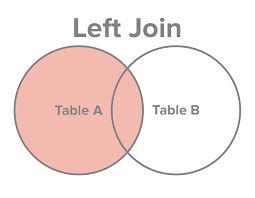

In [30]:
df1.merge(df2,how='left')

,data1,key,data2
0,0,b,21.0
1,1,b,21.0
2,2,a,20.0
3,3,c,NaN
4,4,a,20.0
5,5,a,20.0
6,6,b,21.0


#### Right join

Quédate con todos los de la derecha, y los comunes con el de la iquierda

In [31]:
df1.merge(df2, how = 'right')

,data1,key,data2
0,0.0,b,21
1,1.0,b,21
2,6.0,b,21
3,2.0,a,20
4,4.0,a,20
5,5.0,a,20
6,NaN,d,22


#### Full outer 

Quédate con todos pone todos los posibles y en los que no haya comunes pone nan

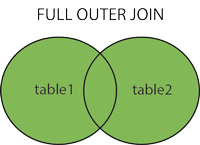

In [29]:
df1.merge(df2, how='outer')

,data1,key,data2
0,0.0,b,21.0
1,1.0,b,21.0
2,6.0,b,21.0
3,2.0,a,20.0
4,4.0,a,20.0
5,5.0,a,20.0
6,3.0,c,NaN
7,NaN,d,22.0


#### Merge eligiendo columna común

Creamos una nueva columna en ambas

In [36]:
df1['X'] = 2
df2['X'] = 42

In [37]:
df1


,data1,key,X
0,0,b,2
1,1,b,2
2,2,a,2
3,3,c,2
4,4,a,2
5,5,a,2
6,6,b,2


In [38]:
df2

,data2,key,X
0,20,a,42
1,21,b,42
2,22,d,42


In [39]:
df1.merge(df2, on='key')

,data1,key,X_x,data2,X_y
0,0,b,2,21,42
1,1,b,2,21,42
2,6,b,2,21,42
3,2,a,2,20,42
4,4,a,2,20,42
5,5,a,2,20,42


Si queremos cambiar el X_x y el X-y, podemos poner:

In [40]:
df1.merge(df1, on='key', suffixes=['x izquierda', 'x derecha'])

,data1x izquierda,key,Xx izquierda,data1x derecha,Xx derecha
0,0,b,2,0,2
1,0,b,2,1,2
2,0,b,2,6,2
3,1,b,2,0,2
4,1,b,2,1,2
5,1,b,2,6,2
6,6,b,2,0,2
7,6,b,2,1,2
8,6,b,2,6,2
9,2,a,2,2,2


####  Merging on index

In [41]:
df1

,data1,key,X
0,0,b,2
1,1,b,2
2,2,a,2
3,3,c,2
4,4,a,2
5,5,a,2
6,6,b,2


In [49]:
df5 = pd.DataFrame({'g':range(4), 'h':range(8,12)}, index=list('abcd'))

In [50]:
df5

,g,h
a,0,8
b,1,9
c,2,10
d,3,11


_Nota_: notas hemos creado un diccionario eligiendo los índices

Objetivo:usar el índice como columna derecha

In [47]:
df1.merge(df5,left_on='key',right_index=True)

,data1,key,X,g,h
0,0,b,2,1,9
1,1,b,2,1,9
6,6,b,2,1,9
2,2,a,2,0,8
4,4,a,2,0,8
5,5,a,2,0,8
3,3,c,2,2,10


###  Concat

No liarse con apped, compararlo, que ahora mismo no me acuerdo. Pone una lista detrás de la otra , dejando a Nan las cololumnas que no existieran en las dos

In [52]:
pd.concat([df1,df5])

,X,data1,g,h,key
0,2.0,0.0,NaN,NaN,b
1,2.0,1.0,NaN,NaN,b
2,2.0,2.0,NaN,NaN,a
3,2.0,3.0,NaN,NaN,c
4,2.0,4.0,NaN,NaN,a
5,2.0,5.0,NaN,NaN,a
6,2.0,6.0,NaN,NaN,b
a,NaN,NaN,0.0,8.0,NaN
b,NaN,NaN,1.0,9.0,NaN
c,NaN,NaN,2.0,10.0,NaN


Vamos a hacer un concatenado con Numpy

In [53]:
import numpy as np

In [54]:
a1 = np.arange(0,24).reshape(4,6)

In [55]:
a1

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

Repaso de eso: nos creamos un array

In [57]:
np.arange(0,24)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

...y cambiamos su dimensión

In [60]:
a1

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [59]:
a2 = np.arange(25,37).reshape(4,3)

In [61]:
a2

array([[25, 26, 27],
       [28, 29, 30],
       [31, 32, 33],
       [34, 35, 36]])

Vamos a concatenar en columnas, lo cual lo indicamos con axis = 1

In [63]:
np.concatenate([a1,a2], axis=1)

array([[ 0,  1,  2,  3,  4,  5, 25, 26, 27],
       [ 6,  7,  8,  9, 10, 11, 28, 29, 30],
       [12, 13, 14, 15, 16, 17, 31, 32, 33],
       [18, 19, 20, 21, 22, 23, 34, 35, 36]])

Si quisiéramos ponerlo en filas, lo intuitivo sería poner axis = 0 y pensar que me pondrá nans a la derecha. Pero no, en este caso Numpy no te hace como Pandas y no te rellenanada, sino que casca

In [65]:
# np.concatenate([a1,a2], axis=0) # casca

### Vamos a ver concpetos parecidos pero con series

In [68]:
s1 = pd.Series(range(4), index=list('abcd'))
s2 = pd.Series(range(10,13), index=list('lmn'))
s3 = pd.Series(range(40,43), index=list('xyz'))
s1,s2,s3

(a    0
 b    1
 c    2
 d    3
 dtype: int64, l    10
 m    11
 n    12
 dtype: int64, x    40
 y    41
 z    42
 dtype: int64)

Las concateno, que lo hace tal cual, añadiendo filas

In [69]:
pd.concat([s1,s2,s3])

a     0
b     1
c     2
d     3
l    10
m    11
n    12
x    40
y    41
z    42
dtype: int64

Si pones axis = 1, te mete todaslas llaves de las tres y te crea una columna diferente para cada serie

In [71]:
pd.concat([s1,s2,s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,2.0,NaN,NaN
d,3.0,NaN,NaN
l,NaN,10.0,NaN
m,NaN,11.0,NaN
n,NaN,12.0,NaN
x,NaN,NaN,40.0
y,NaN,NaN,41.0
z,NaN,NaN,42.0


Para elegir los nombres de las columnas:

In [72]:
pd.concat([s1,s2,s3], axis=1, keys=['Pim', 'Pam', 'Pum'])

,Pim,Pam,Pum
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,2.0,NaN,NaN
d,3.0,NaN,NaN
l,NaN,10.0,NaN
m,NaN,11.0,NaN
n,NaN,12.0,NaN
x,NaN,NaN,40.0
y,NaN,NaN,41.0
z,NaN,NaN,42.0


### Volvemos a frames

In [73]:
df1

,data1,key,X
0,0,b,2
1,1,b,2
2,2,a,2
3,3,c,2
4,4,a,2
5,5,a,2
6,6,b,2


In [74]:
df2

,data2,key,X
0,20,a,42
1,21,b,42
2,22,d,42


In [75]:
pd.concat([df1,df2])

,X,data1,data2,key
0,2,0.0,NaN,b
1,2,1.0,NaN,b
2,2,2.0,NaN,a
3,2,3.0,NaN,c
4,2,4.0,NaN,a
5,2,5.0,NaN,a
6,2,6.0,NaN,b
0,42,NaN,20.0,a
1,42,NaN,21.0,b
2,42,NaN,22.0,d


_Nota_: observamos que los índices están repetidos.

Si queremos que no use el índice y él vaya metiendo índices secuencialmente:

In [76]:
pd.concat([df1,df2], ignore_index=True)

,X,data1,data2,key
0,2,0.0,NaN,b
1,2,1.0,NaN,b
2,2,2.0,NaN,a
3,2,3.0,NaN,c
4,2,4.0,NaN,a
5,2,5.0,NaN,a
6,2,6.0,NaN,b
7,42,NaN,20.0,a
8,42,NaN,21.0,b
9,42,NaN,22.0,d


###  Comentario aparte

Python permite el monkeypatching

In [78]:
# pd.concat = df1 No falla!! Estoy cepillándome la función concat
# pd.concat([s1,s2]) Falla, porque ya concat no es una función
# del(pd.concat) Intento arreglarlo borrando esa variable
# pd.concat([s1,s2]) Sigue sin funcionar

Para arreglarlo

In [77]:
#import imp
#imp.reload(pd) #pd o el nombre que le pusiéramos a panda

Eso es útil para cuando estés trabajando con un módulo propio y hacéis un cambio en vuestro módulo y necesitáis que se recarge en vuestro módulo, se hace esto y ventilado. 

## Transformación de datos

###  Borrando duplicados : muy improtante en el datachallenge de Amadeus, muymuy importante!

In [93]:
df6 = pd.DataFrame({'key1:':['one']*3 + ['two']*4,
                    'key2':[1,1,2,3,3,4,4]})

In [80]:
df6


,key1:,key2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


_Nota_: ojo al truquito para repetir varios unos o dos

Vamos a ver los duplicados

In [82]:
df6.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

_Nota_: Los índices, por supuesto, no los tiene en cuenta.
_Nota_: Se marca duplicado en el segundo , tercero, cuarto repetido, peroen el primero te pone un false

Para obtener los elementos duplicadosusamos la funcionalidad de selección de pandas, que sólo requiere una lista de booleanos, que  ya nos la da duplicated()

In [83]:
df6[df6.duplicated()]

,key1:,key2
1,one,1
4,two,3
6,two,4


Para obtener *una copia* sin duplicados tenemos un método

In [88]:
df6.drop_duplicates()

,key1:,key2
0,one,1
2,one,2
3,two,3
5,two,4


_Nota_: se queda con la primera aparición. 

Si queremos quedarnos con la última aparición:

In [86]:
df6.drop_duplicates(keep='last')

,key1:,key2
1,one,1
2,one,2
4,two,3
6,two,4


Para que cuando se encuentre duplicados los quite todos:

In [90]:
df6.drop_duplicates(keep=False)

,key1:,key2
2,one,2


### Cambiando índices

In [91]:
df6

,key1:,key2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [94]:
df6.index = list('qwertyu')

In [95]:
df6

,key1:,key2
q,one,1
w,one,1
e,one,2
r,two,3
t,two,3
y,two,4
u,two,4


También puedo asignar una columna de la dataframe com índice

In [96]:
df6.index = df6['key2']

In [97]:
df6

,key1:,key2
key2,,
1,one,1
1,one,1
2,one,2
3,two,3
3,two,3
4,two,4
4,two,4


## Discretización y _binning_

Diferencia entre gráfico de barras e histograma:

* Gráfico de barras es una simple representación que he elegido hacerlo con barras.
* Un histograma se representa mediante un gráfico de barras. Y se define con _Gráfico de la representación de distribuciones de frecuencias, en el que se emplean rectángulos dentro de unas coordenadas_.

<img src="https://sistemas.com/termino/wp-content/uploads/histograma.jpg"/>

* En la X se ponen distintos cajones (_bins_), uno por cada rango de estatura elegido.
* En la Y aparece el número de personas que están en ese rango. 


####  Vamos a hacer un histograma de edades

In [102]:
ages = [18,25,22,45,91,67,20,38,38,56]

In [103]:
bins = [18,25,35,65,100]

In [104]:
points = [3,1,4,2]

In [105]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

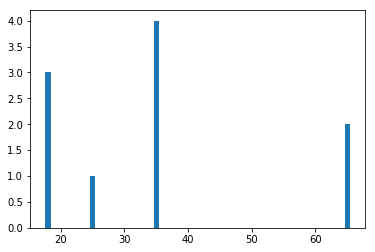

In [106]:
plt.bar(bins[0:-1],points)

_NOTA_: Esto es un gráfico de barras, que hemos dicho que no nos vale mucho, además he tenido que cortar uno, vamos, una pesadez. Por otro lado, no ha salido centrado en el intervalo. 

Para calcular los puntos, lo mejos es usar pd.cut, que ya te lo hace

In [108]:
cuts = pd.cut(ages,bins)
cuts.value_counts()

(18, 25]     3
(25, 35]     0
(35, 65]     4
(65, 100]    2
dtype: int64

In [ ]:
Esto no me vale, lo queremos con intervalo izquierdo incluido y derecho no:

In [109]:
cuts = pd.cut(ages,bins,right=False)
cuts.value_counts()

[18, 25)     3
[25, 35)     1
[35, 65)     4
[65, 100)    2
dtype: int64

Para pintar el histograma, lo mejor es:

(array([3., 1., 4., 2.]),
 array([ 18,  25,  35,  65, 100]),
 <a list of 4 Patch objects>)

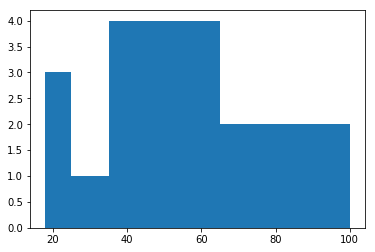

In [112]:
plt.hist(ages,bins= bins)

Si no pones bins, él te hace _lo que puede_:

(array([4., 0., 2., 1., 0., 1., 1., 0., 0., 1.]),
 array([18. , 25.3, 32.6, 39.9, 47.2, 54.5, 61.8, 69.1, 76.4, 83.7, 91. ]),
 <a list of 10 Patch objects>)

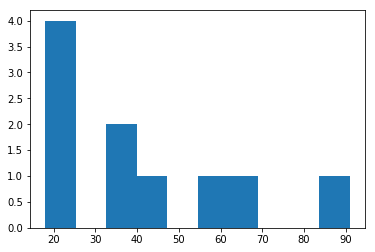

In [113]:
plt.hist(ages )

In [114]:
plt.hist?

## Trabajando con strings en pandas: _Vectorized string functions in Pandas_

In [117]:
animals = 'rinocerante girafa molerate gamba pantera mosquito ballena'.split()
animals

['rinocerante',
 'girafa',
 'molerate',
 'gamba',
 'pantera',
 'mosquito',
 'ballena']

In [118]:
list(map(lambda x: x.capitalize(), animals))

['Rinocerante',
 'Girafa',
 'Molerate',
 'Gamba',
 'Pantera',
 'Mosquito',
 'Ballena']

In [121]:
animals_feo = [' gallinA', 'cododrILO  ']

Es útil _descapitalizar_ string y quitar espacios para la hora de comparar

In [131]:
list(map(lambda x: x.lower().strip(), animals_feo))

['gallina', 'cododrilo']

Hasta aquí no hemos hecho nada con Pandas. 

### Uso de _str_ para tratar con series (y columnas de dataframes) de tipo string

In [122]:
df1

,data1,key,X
0,0,b,2
1,1,b,2
2,2,a,2
3,3,c,2
4,4,a,2
5,5,a,2
6,6,b,2


In [123]:
df1['animals'] = animals

In [124]:
df1

,data1,key,X,animals
0,0,b,2,rinocerante
1,1,b,2,girafa
2,2,a,2,molerate
3,3,c,2,gamba
4,4,a,2,pantera
5,5,a,2,mosquito
6,6,b,2,ballena


In [125]:
df1['animals'].str.len()

0    11
1     6
2     8
3     5
4     7
5     8
6     7
Name: animals, dtype: int64

In [126]:
df1['animals'].str.count('o')

0    1
1    0
2    1
3    0
4    0
5    2
6    0
Name: animals, dtype: int64

In [128]:
df1['animals'].str.capitalize()

0    Rinocerante
1         Girafa
2       Molerate
3          Gamba
4        Pantera
5       Mosquito
6        Ballena
Name: animals, dtype: object

In [129]:
df1['animals'].str.contains('n')

0     True
1    False
2    False
3    False
4     True
5    False
6     True
Name: animals, dtype: bool

In [130]:
df1[df1['animals'].str.contains('n')]

,data1,key,X,animals
0,0,b,2,rinocerante
4,4,a,2,pantera
6,6,b,2,ballena


In [134]:
df1[df1['animals'].str.len() >= 7]

,data1,key,X,animals
0,0,b,2,rinocerante
2,2,a,2,molerate
4,4,a,2,pantera
5,5,a,2,mosquito
6,6,b,2,ballena


Ejercicio: modificar df1 para que su columna animals sea los animales con mayusculas

In [136]:
df1['animals'] = df1['animals'].str.upper()
df1

,data1,key,X,animals
0,0,b,2,RINOCERANTE
1,1,b,2,GIRAFA
2,2,a,2,MOLERATE
3,3,c,2,GAMBA
4,4,a,2,PANTERA
5,5,a,2,MOSQUITO
6,6,b,2,BALLENA
